### just a quick demo that shows how to recreate some of the visuals from the project :)
**See `fish_utils.py` for source code.**


In [1]:
# general imports
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from tqdm.notebook import tqdm as tqdm


# local imports
import fish_utils as fi 
import visuals as vi
from constants import *
parts
edges

c:\Users\erika\miniconda3\envs\fish\python.exe
2.2.3


[('L_eye', 'mouth'),
 ('R_eye', 'mouth'),
 ('L_eye', 'spine'),
 ('R_eye', 'spine'),
 ('spine', 'tail')]

In [2]:
# let's look at some sample data
filename = "erikas_1min.csv"
df = fi.load_and_preprocess_data(filepath=filename)

================= average distances to center =====================

average distances to center are 
{'track_0': 263.1016379399219, 'track_1': 299.5061091248718, 'track_2': 253.2622107234251, 'track_3': 318.42424916590505}


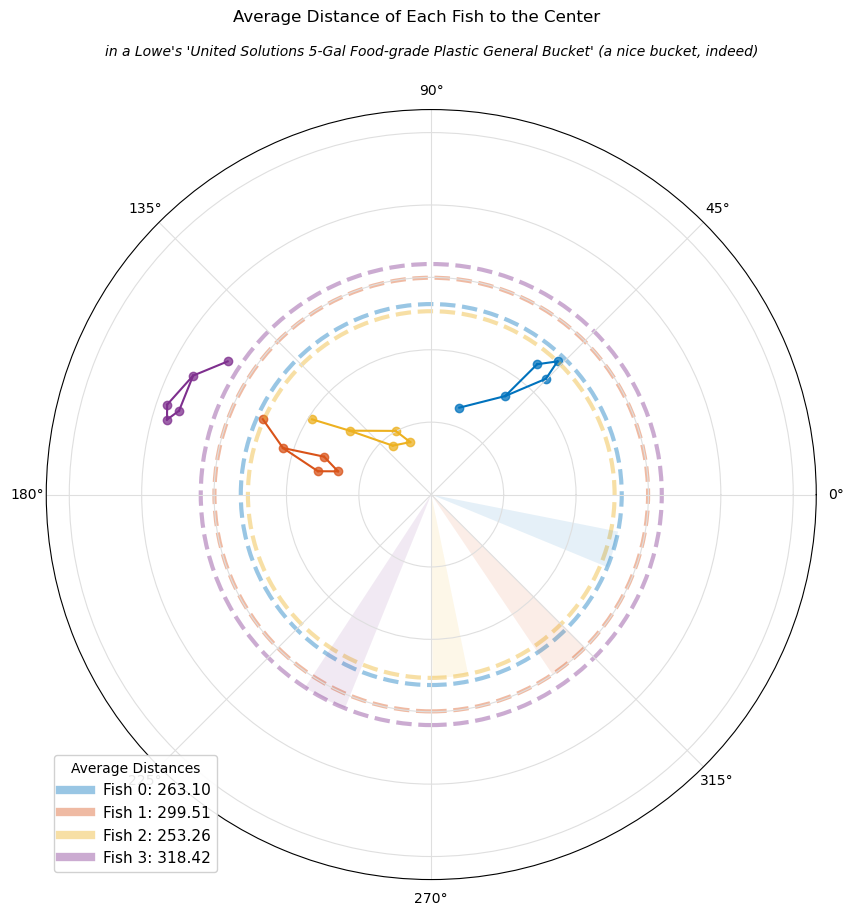

In [3]:
# example of calculating average distances to center and plotting those distances
avg_dists = fi.calc_avg_center_dist(df)
print(f"average distances to center are \n{avg_dists}")
vi.plot_avg_center_dists(1008, center_method='least_squares')


================= sample velocity analysis with wavelets =====================

Processing track_0...
processing complete for track_0.
Processing track_1...
processing complete for track_1.
Processing track_2...
processing complete for track_2.
Processing track_3...
processing complete for track_3.


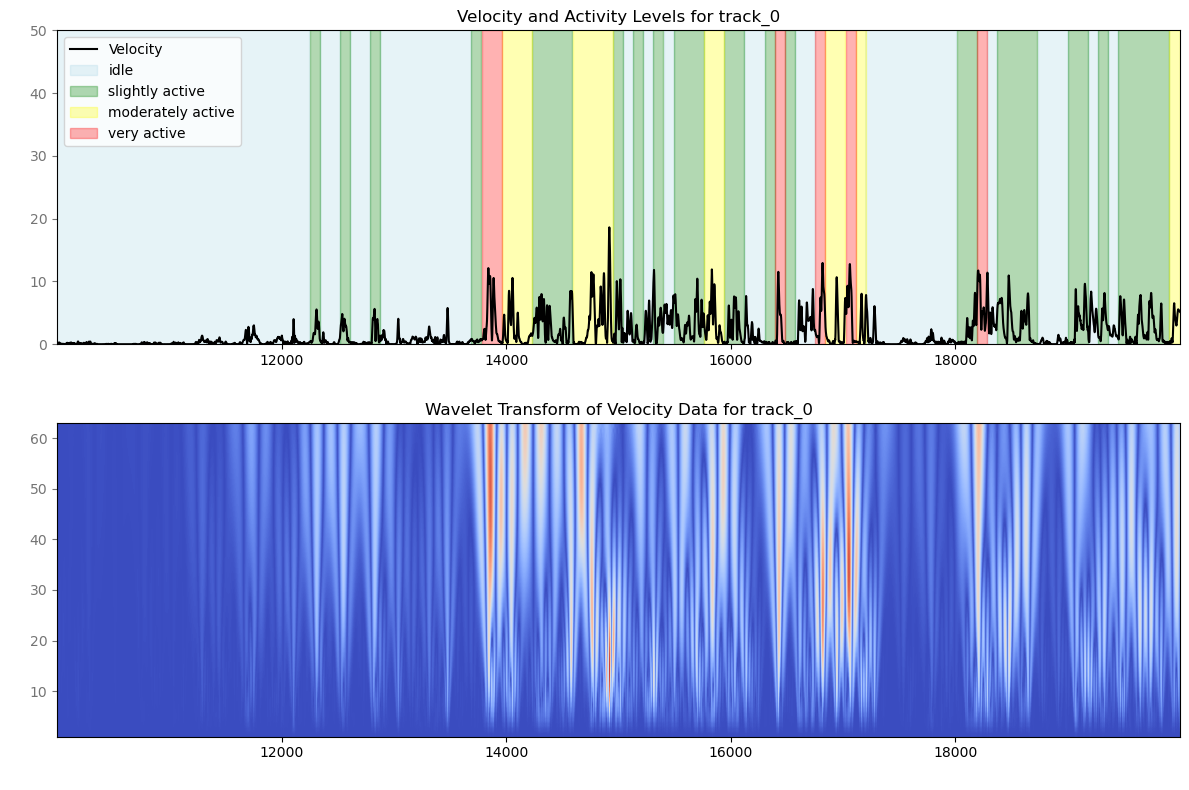

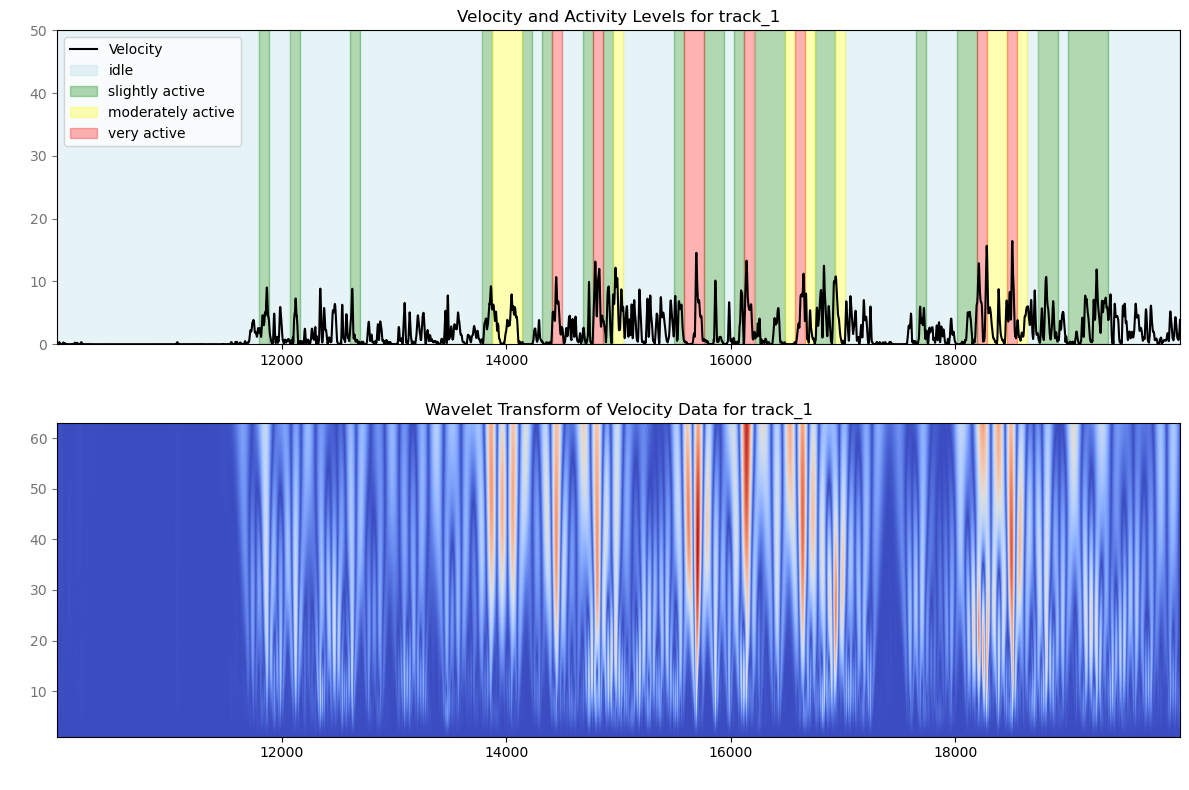

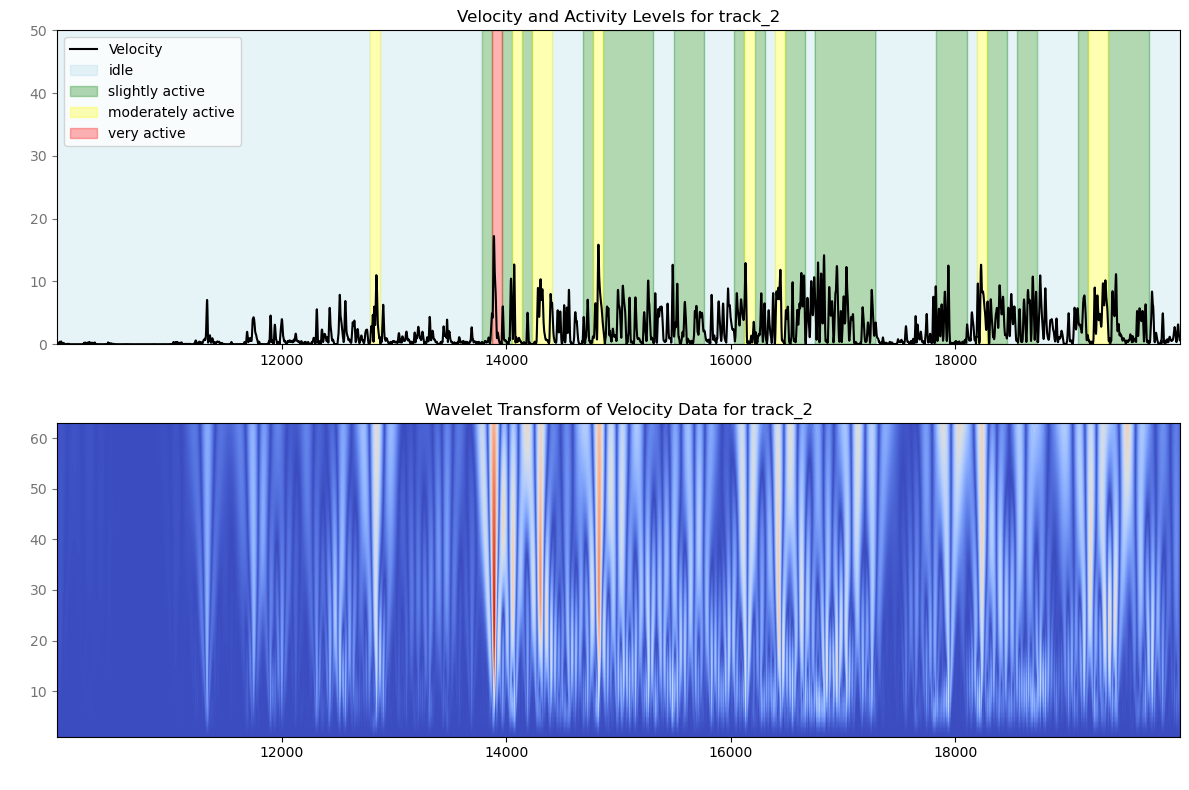

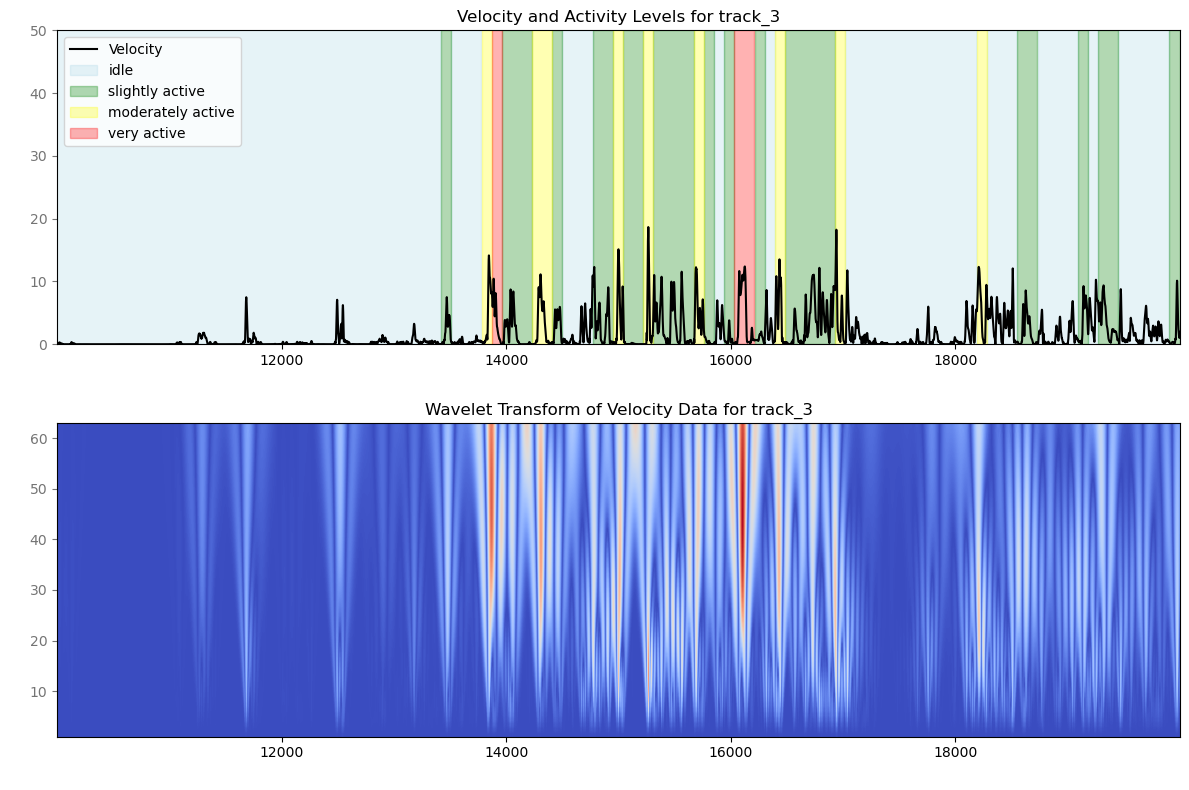

In [4]:
filename = "erikas_t2_4s.csv"
erika_csv = pd.read_csv(filename)

# defining some scales and window size for our wavelet
scales = np.arange(1, 64)
window_size = 90  
track_ids = ['track_0', 'track_1', 'track_2', 'track_3']  
df = fi.load_and_preprocess_data(filepath=filename)
df = df[(df['frame_idx'] > 10000) & (df['frame_idx'] < 20000)]
velo_df = fi.calc_all_velocities_smooth(df, win=25)[0]  

# applying the process for each of our fish tracks (4 fish)
activity_results = {}
for track in track_ids:
    print(f"Processing {track}...")
    energy, coefficients = fi.perform_cwt_and_compute_energy(velo_df, track, scales, wavelet='mexh')  # others work as well but 'mexh' seemed to suit the fish
    wavelet_energy = pd.DataFrame({f'{track}_energy': energy})
    windowed_energy = fi.aggregate_energy_over_windows(wavelet_energy, window_size)

    if len(windowed_energy) > 1:
        classified_energy = fi.classify_activity_levels(windowed_energy)
    else:
        print(f"Skipping {track} due to insufficient data.")
        continue

    activity_results[track] = {
        'energy': classified_energy,
        'coefficients': coefficients
    }
    print(f"processing complete for {track}.")


# visualizing the velocity data for each of 4 fish
for track in track_ids:
    if track in activity_results:
        vi.visualize_activity_and_wavelet(velo_df, activity_results, track, window_size, scales, y_max=50)


================= KDE plots for spatial preference analysis =====================

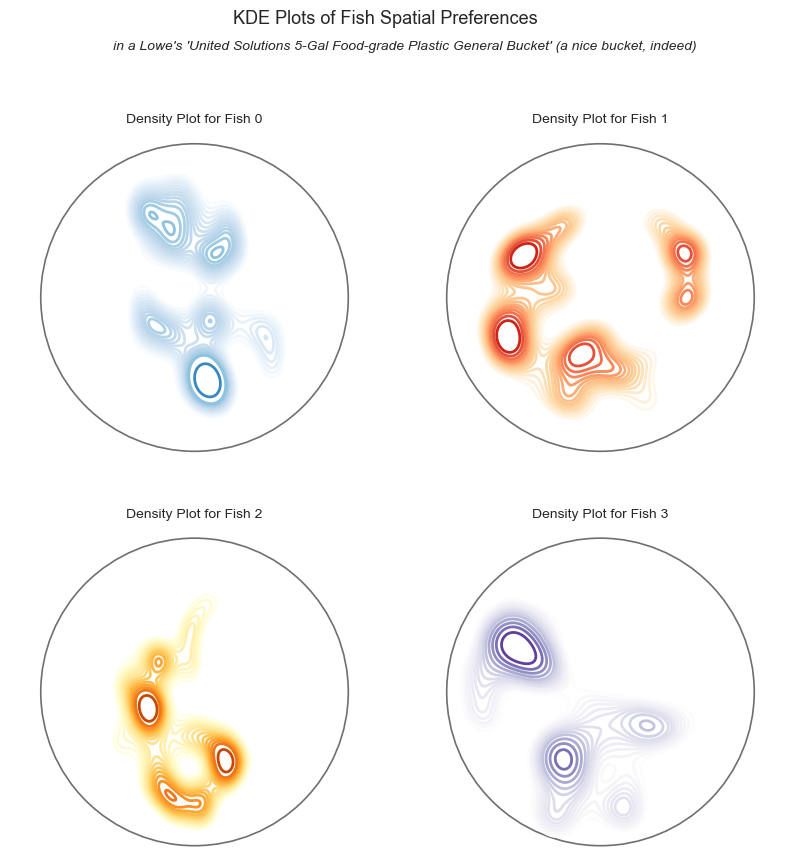

In [5]:
filename = 'erikas_1min.csv'
vi.plot_kde_circle(filepath=filename, center_method = 'least_squares', figsize=(10,10))